# COVID-19 : INDIA 

The COVID-19 pandemic in India is part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first case of COVID-19 in India, which originated from China, was reported on 30 January 2020. India currently has the largest number of confirmed cases in Asia, and has the second-highest number of confirmed cases in the world after the United States with more than 10.3 million reported cases of COVID-19 infection and more than 150,000 deaths as of January 06, 2021.The per day cases peaked mid-September in India with over 90,000 cases reported per day and have since come down to below 40,000 in December.

In July 2020, India's Ministry of Information and Broadcasting claimed the country's case fatality rate was among the lowest in the world at 2.41% and "steadily declining". By mid-May 2020, six cities accounted for around half of all reported cases in the country – Mumbai, Delhi, Ahmedabad, Chennai, Pune and Kolkata. The last region to report its first case was Lakshwadeep, on 19 January 2021, nearly a year after the first reported case in India. On 10 June, India's recoveries exceeded active cases for the first time. Infection rates started to drop significantly in September, and the number of daily new cases and active cases started to decline rapidly. A Government panel on COVID-19 announced in October that the pandemic had peaked in India, and may come under control by February 2021. India has over 30 anti-COVID vaccines in various stages of development and a national vaccination drive was started on 16 January 2021.



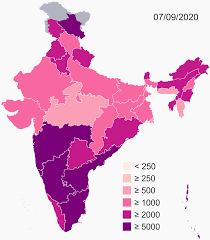

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv


In [2]:
Testing = pd.read_csv('/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv')
Testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [3]:
Summary = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv')
Summary.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


# -> Data Cleaning

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from matplotlib import pyplot
import warnings; warnings.simplefilter('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

In [5]:
Testing.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        3772
Positive        3200
dtype: int64

In [6]:
Testing.Negative = Testing.Negative.fillna('0') 
Testing.Positive = Testing.Positive.fillna('0') 

In [7]:
Testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12
1,2020-04-24,Andaman and Nicobar Islands,2679.0,0,27
2,2020-04-27,Andaman and Nicobar Islands,2848.0,0,33
3,2020-05-01,Andaman and Nicobar Islands,3754.0,0,33
4,2020-05-16,Andaman and Nicobar Islands,6677.0,0,33


In [8]:
Summary.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [9]:
Summary['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [10]:
Summary['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [11]:
Summary.rename(columns = {'State/UnionTerritory':'State'},inplace=True)

In [12]:
Summary

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173


In [13]:
Summary['State'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [14]:
Summary=Summary.replace('Telengana','Telangana')
Summary=Summary.replace('Telengana***','Telangana')
Summary=Summary.replace('Telangana***','Telangana')
Summary=Summary.replace('Maharashtra***','Maharashtra')
Summary=Summary.replace('Chandigarh***','Chandigarh')
Summary=Summary.replace('Punjab***','Punjab')

In [15]:
dropn_indexnames =Summary[(Summary['State'] == 'Cases being reassigned to states')].index 
Summary.drop(dropn_indexnames,inplace=True)

In [16]:
Summary['State'].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli', 'Sikkim',
       'Daman & Diu', 'Dadra and Nagar Haveli and Daman and Diu'],
      dtype=object)

In [17]:
Summary.isnull().sum()

Sno                         0
Date                        0
Time                        0
State                       0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [18]:
Testing.isnull().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [19]:
Summary.describe()

,Sno,Cured,Deaths,Confirmed
count,9231.000000,9.231000e+03,9231.000000,9.231000e+03
mean,4655.470372,7.914376e+04,1497.289676,9.239929e+04
std,2687.877049,1.936324e+05,4727.578926,2.171926e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2314.500000,1.710000e+02,2.000000,5.230000e+02
50%,4676.000000,4.437000e+03,69.000000,6.841000e+03
75%,6983.500000,5.889750e+04,932.500000,8.035250e+04
max,9291.000000,1.737080e+06,47827.000000,1.859367e+06


In [20]:
df = Summary.tail(35) ## Extract most recent date's info & data
df1 = df.sort_values(by='Confirmed', ascending=False).head(10)

In [21]:
Testing = Testing.astype({'Positive': 'int32'})

In [22]:
Testing.dtypes

Date             object
State            object
TotalSamples    float64
Negative         object
Positive          int32
dtype: object

# -> DATA VISUALIZATION

## OVERVIEW IN NUMBERS

Total Confirmed cases = 9735850
Total Cured cases = 9215581
Total Active cases = 520269
Total Death cases = 141360


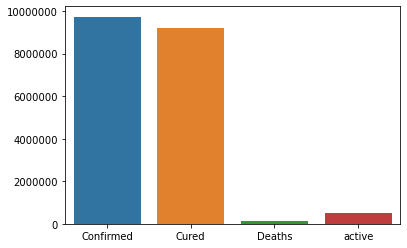

In [23]:
x = df['Confirmed'].sum()
y = df['Cured'].sum()
z= df['Deaths'].sum()
active= x-y
print('Total Confirmed cases =',x)
print('Total Cured cases =',y)
print('Total Active cases =',active)
print('Total Death cases =',z)
barp = sns.barplot(x=['Confirmed','Cured','Deaths','active'],y=[x,y,z,active])
barp.set_yticklabels(labels=(barp.get_yticks()*1).astype(int))
plt.show()

# Exploring trends in top 10 Contaminated states

## -> Top 10 States by Confirmed Cases

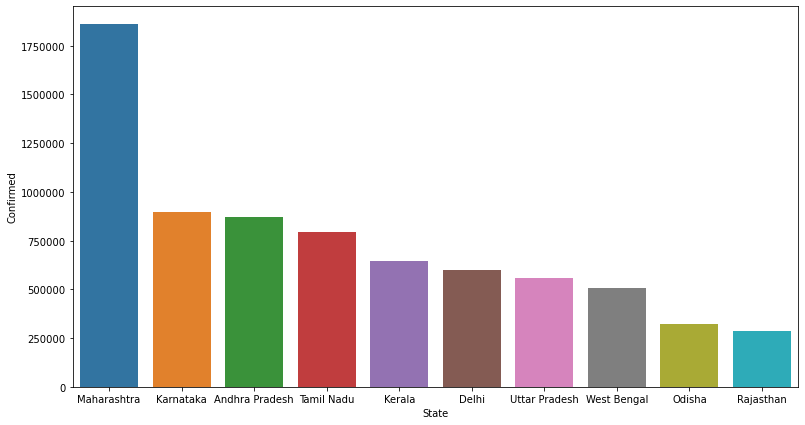

In [24]:
a4_dims = (13, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
barp = sns.barplot(data=df1,x='State',y='Confirmed',ax=ax)
barp.set_yticklabels(labels=(barp.get_yticks()*1).astype(int))
plt.show()

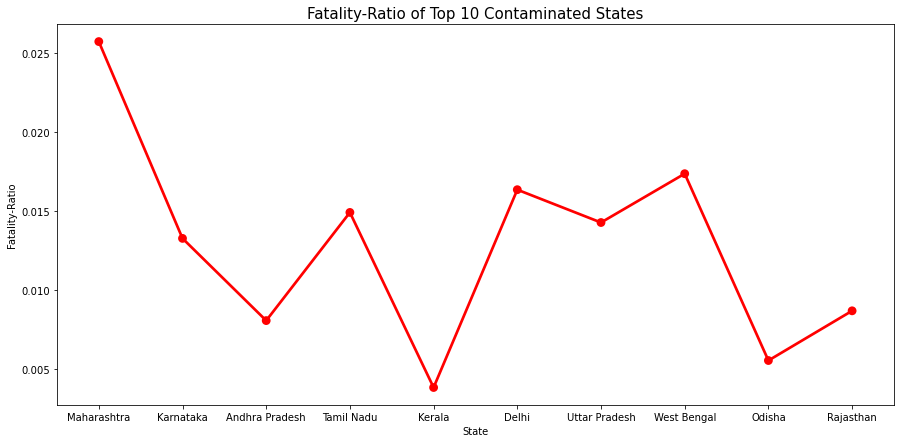

In [25]:
df1['Fatality-Ratio'] = df1['Deaths']/df1['Confirmed']
a4_dims = (15, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title('Fatality-Ratio of Top 10 Contaminated States',size=15)
sns.pointplot(data=df1,x='State',y='Fatality-Ratio',ax=ax,color='Red')
plt.show()

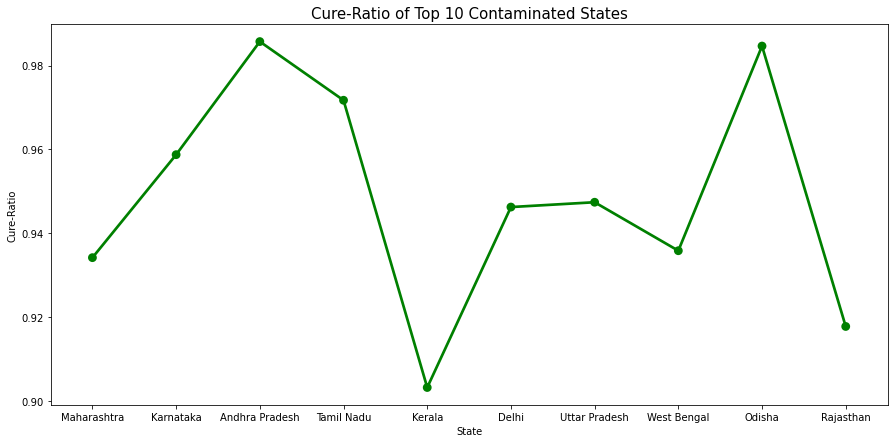

In [26]:
df1['Cure-Ratio'] = df1['Cured']/df1['Confirmed']
a4_dims = (15, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title('Cure-Ratio of Top 10 Contaminated States',size=15)
sns.pointplot(data=df1,x='State',y='Cure-Ratio',ax=ax,color='Green')
plt.show()

## Time Series Analysis of most contaminated State (Maharashtra)

## -> Maharashtra time series analysis

In [27]:
Maharashtra = Summary[Summary.State == 'Maharashtra']
Maharashtra

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,09/03/20,6:00 PM,Maharashtra,2,0,0,0,2
91,92,10/03/20,6:00 PM,Maharashtra,5,0,0,0,5
97,98,11/03/20,6:00 PM,Maharashtra,2,0,0,0,2
120,121,12/03/20,6:00 PM,Maharashtra,11,0,0,0,11
133,134,13/03/20,6:00 PM,Maharashtra,14,0,0,0,14
...,...,...,...,...,...,...,...,...,...
9135,9136,05/12/20,8:00 AM,Maharashtra,-,-,1710050,47599,1842587
9170,9171,06/12/20,8:00 AM,Maharashtra,-,-,1715884,47694,1847509
9205,9206,07/12/20,8:00 AM,Maharashtra,-,-,1723370,47734,1852266
9240,9241,08/12/20,8:00 AM,Maharashtra,-,-,1730715,47774,1855341


In [28]:
 req = Maharashtra[Maharashtra['Date'].isin(['09/03/20','09/04/20','09/05/20','09/06/20','09/07/20','09/08/20','09/09/20','09/10/20','09/11/20','09/12/20'])]

## Retrieving months to fit the Time series plot

In [29]:
req

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,09/03/20,6:00 PM,Maharashtra,2,0,0,0,2
788,789,09/04/20,5:00 PM,Maharashtra,-,-,117,72,1135
1756,1757,09/05/20,8:00 AM,Maharashtra,-,-,3470,731,19063
2829,2830,09/06/20,8:00 AM,Maharashtra,-,-,40975,3169,88528
3910,3911,09/07/20,8:00 AM,Maharashtra,-,-,123192,9448,223724
5005,5006,09/08/20,8:00 AM,Maharashtra,-,-,338362,17367,503084
6090,6091,09/09/20,8:00 AM,Maharashtra,-,-,672556,27407,943772
7140,7141,09/10/20,8:00 AM,Maharashtra,-,-,1212016,39430,1493884
8225,8226,09/11/20,8:00 AM,Maharashtra,-,-,1577322,45240,1719858
9275,9276,09/12/20,8:00 AM,Maharashtra,-,-,1737080,47827,1859367


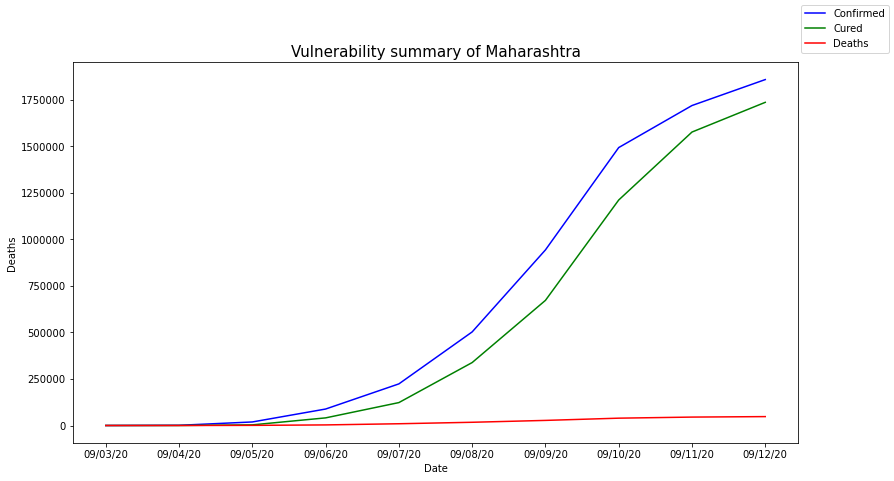

In [30]:
a4_dims = (13, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
pp = sns.lineplot(data=req,x='Date',y='Confirmed',ax=ax,color='Blue')
pp = sns.lineplot(data=req,x='Date',y='Cured',ax=ax,color='Green')
pp = sns.lineplot(data=req,x='Date',y='Deaths',ax=ax,color='Red')
pp.set_yticklabels(labels=(pp.get_yticks()*1).astype(int))
fig.legend(labels=['Confirmed','Cured','Deaths'])
plt.title('Vulnerability summary of Maharashtra',size=15)
plt.show()

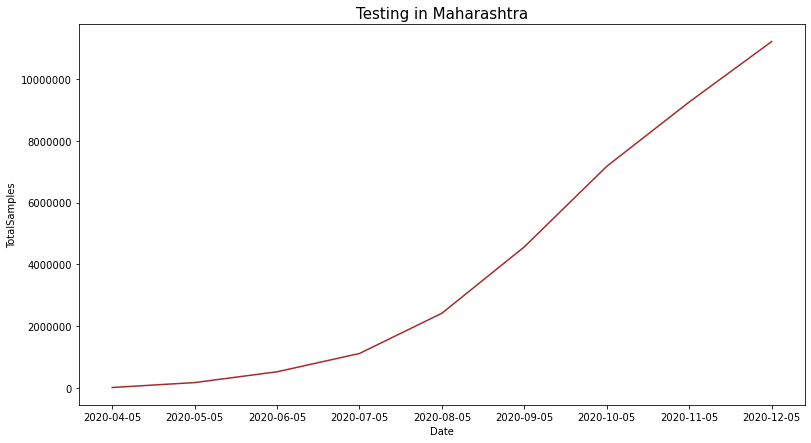

In [31]:
test_maha = Testing[Testing.State == 'Maharashtra']
reqe = test_maha[test_maha['Date'].isin(['2020-04-05','2020-05-05','2020-06-05','2020-07-05','2020-08-05','2020-09-05','2020-10-05','2020-11-05','2020-12-05'])]
a4_dims = (13, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
lp = sns.lineplot(x='Date',y='TotalSamples',data=reqe,ax=ax,color='brown')
lp.set_yticklabels(labels=(lp.get_yticks()*1).astype(int))
plt.title('Testing in Maharashtra',size=15)
plt.show()

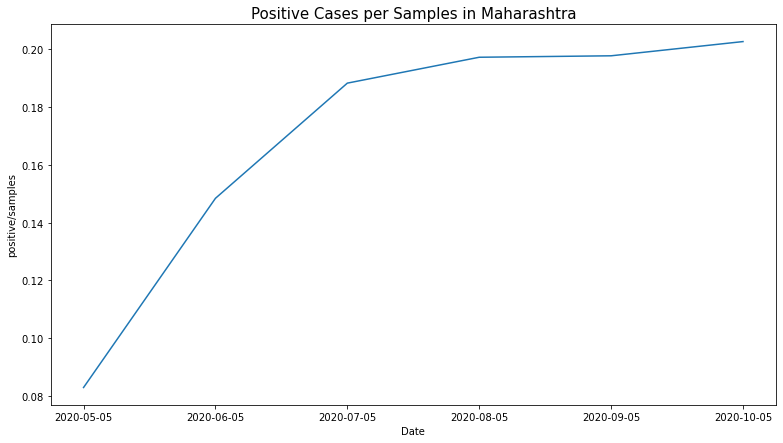

In [32]:
a4_dims = (13, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
reqe['positive/samples'] = (reqe['Positive']/reqe['TotalSamples'])
df =reqe.iloc[1:7]
sns.lineplot(x='Date',y='positive/samples',ax=ax,data=df)
plt.title('Positive Cases per Samples in Maharashtra',size=15)
plt.show()

## Time series trends of all States

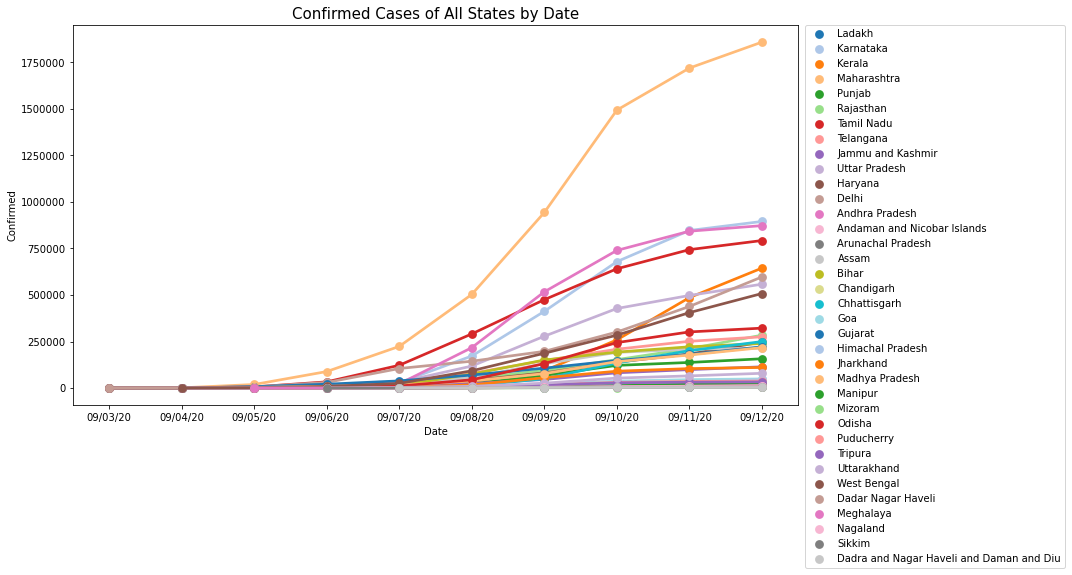

In [33]:
req = Summary[Summary['Date'].isin(['09/03/20','09/04/20','09/05/20','09/06/20','09/07/20','09/08/20','09/09/20','09/10/20','09/11/20','09/12/20'])]
a4_dims = (13, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
lp= sns.pointplot(x='Date',y='Confirmed',hue='State',ax=ax,data=req,palette='tab20')
lp.set_yticklabels(labels=(lp.get_yticks()*1).astype(int))
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('Confirmed Cases of All States by Date',size=15)
plt.show()

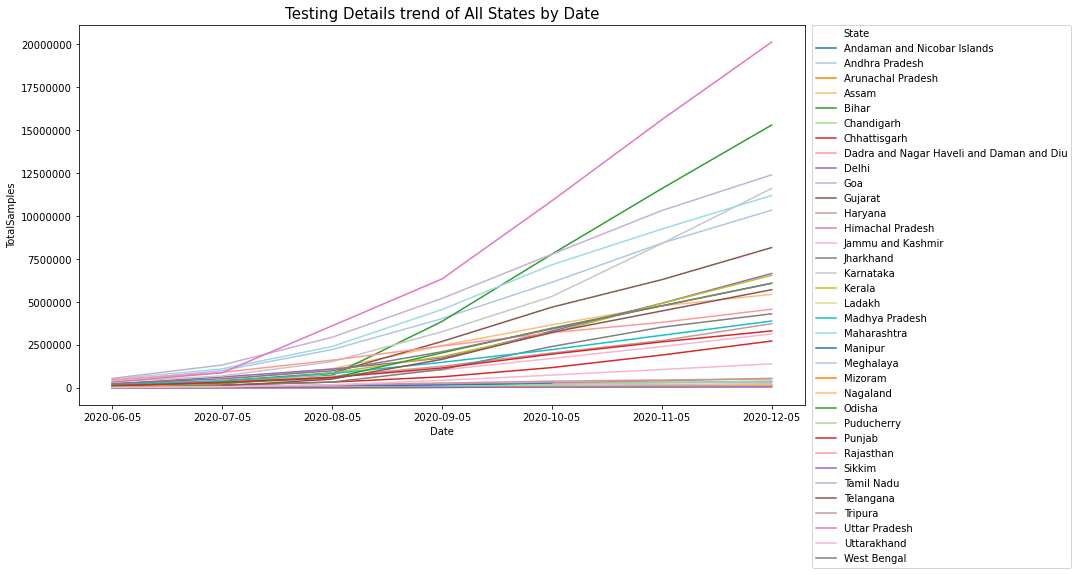

In [34]:
reqe = Testing[Testing['Date'].isin(['2020-06-05','2020-07-05','2020-08-05','2020-09-05','2020-10-05','2020-11-05','2020-12-05'])]
a4_dims = (13, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
lp= sns.lineplot(x='Date',y='TotalSamples',hue='State',ax=ax,data=reqe,palette='tab20')
lp.set_yticklabels(labels=(lp.get_yticks()*1).astype(int))
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('Testing Details trend of All States by Date',size=15)
plt.show()

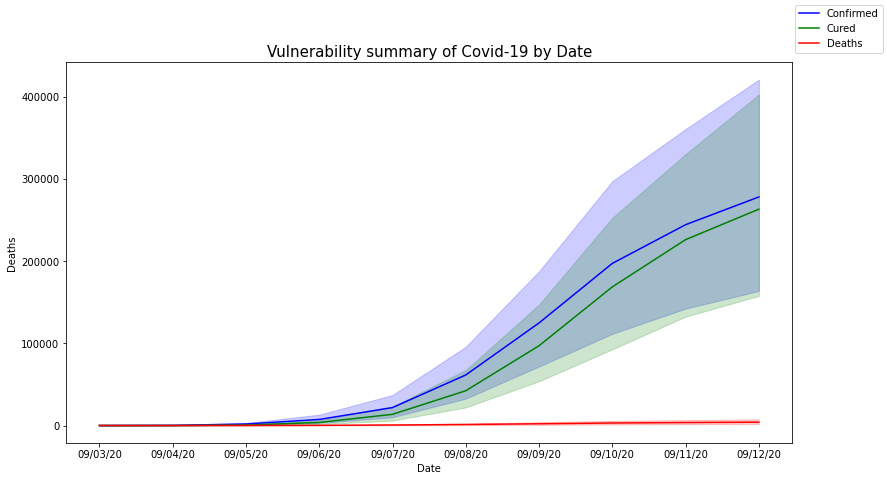

In [35]:
a4_dims = (13, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
pp = sns.lineplot(data=req,x='Date',y='Confirmed',ax=ax,color='Blue')
pp = sns.lineplot(data=req,x='Date',y='Cured',ax=ax,color='Green')
pp = sns.lineplot(data=req,x='Date',y='Deaths',ax=ax,color='Red')
pp.set_yticklabels(labels=(pp.get_yticks()*1).astype(int))
fig.legend(labels=['Confirmed','Cured','Deaths'])
plt.title('Vulnerability summary of Covid-19 by Date',size=15)
plt.show()